# Task 2 Prueba

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

In [37]:
df_1 = pd.read_csv("data/raw/measurement_data.csv")
df_2 = pd.read_csv("data/raw/instrument_data.csv")
df_3 = pd.read_csv("data/raw/pollutant_data.csv")

measurement_data = df_1.copy()
instrument_data = df_2.copy()
pollutant_data = df_3.copy()

# 📌Measurement_data

In [ ]:
measurement_data

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...
621583,2023-11-30 19:00:00,228,37.544962,127.136792,0.005,0.061,0.002,0.7,72.0,18.0
621584,2023-11-30 20:00:00,228,37.544962,127.136792,0.005,0.060,0.003,0.7,64.0,18.0
621585,2023-11-30 21:00:00,228,37.544962,127.136792,0.005,0.061,0.003,0.7,55.0,18.0
621586,2023-11-30 22:00:00,228,37.544962,127.136792,0.004,0.053,0.005,0.6,50.0,18.0


In [ ]:
measurement_data.info() #Parece que no hay null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621588 entries, 0 to 621587
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  621588 non-null  object 
 1   Station code      621588 non-null  int64  
 2   Latitude          621588 non-null  float64
 3   Longitude         621588 non-null  float64
 4   SO2               621588 non-null  float64
 5   NO2               621588 non-null  float64
 6   O3                621588 non-null  float64
 7   CO                621588 non-null  float64
 8   PM10              621588 non-null  float64
 9   PM2.5             621588 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.4+ MB


In [ ]:
# MEASUREMENT DATE
measurement_data["Measurement date"]

# Pasarla de objeto a datetime
measurement_data["Measurement date"] = pd.to_datetime(measurement_data["Measurement date"])

In [ ]:
# STATION CODE
measurement_data["Station code"].value_counts()


Station code
213    25906
204    25905
227    25905
214    25905
221    25904
218    25904
212    25904
207    25896
222    25894
215    25892
220    25892
216    25892
210    25891
208    25890
205    25173
228    25172
224    24453
225    24453
219    23710
209    23709
217    23057
226    23056
211    22316
223    22316
206    21593
Name: count, dtype: int64

In [ ]:
# LATITUDE
measurement_data["Latitude"].value_counts()

Latitude
37.584848    25906
37.572016    25905
37.502686    25905
37.606719    25905
37.452357    25904
37.525939    25904
37.575743    25904
37.609823    25896
37.525007    25894
37.647930    25892
37.498498    25892
37.654192    25892
37.541864    25891
37.593742    25890
37.564263    25173
37.544962    25172
37.487355    24453
37.504547    24453
37.544640    23710
37.555580    23709
37.658774    23057
37.517528    23056
37.547180    22316
37.480917    22316
37.540033    21593
Name: count, dtype: int64

In [ ]:
# LONGITUDE
measurement_data["Longitude"].value_counts()

Longitude
127.094023    25906
127.005008    25905
127.092509    25905
127.027279    25905
126.908296    25904
126.856603    25904
127.028885    25904
126.934848    25896
126.897370    25894
127.011952    25892
126.889692    25892
127.029088    25892
127.049659    25891
126.949679    25890
126.974676    25173
127.136792    25172
126.927102    24453
126.994458    24453
126.835151    23710
126.905597    23709
127.068505    23057
127.047470    23056
127.092493    22316
126.971481    22316
127.004850    21593
Name: count, dtype: int64

In [ ]:
measurement_data.columns

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')

In [ ]:
# ¿Cuantos centros hay? 

centros = ['Station code','Latitude','Longitude']
for centro in centros:
    print(f"--- {centro} ---")
    print("Valores únicos:", measurement_data[centro].nunique())
    print()

# Hay 25 centros diferentes.

--- Station code ---
Valores únicos: 25

--- Latitude ---
Valores únicos: 25

--- Longitude ---
Valores únicos: 25



In [ ]:
# ¿Hay valores negativos? 

pollutants = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

for pollutant in pollutants:
    print(f"--- {pollutant} ---")
    print("Valores únicos:", measurement_data[pollutant].nunique())
    print("Valores negativos:", measurement_data[pollutant][measurement_data[pollutant] < 0].count())
    print()


--- SO2 ---
Valores únicos: 181
Valores negativos: 3563

--- NO2 ---
Valores únicos: 131
Valores negativos: 3421

--- O3 ---
Valores únicos: 250
Valores negativos: 3640

--- CO ---
Valores únicos: 162
Valores negativos: 3617

--- PM10 ---
Valores únicos: 550
Valores negativos: 3514

--- PM2.5 ---
Valores únicos: 321
Valores negativos: 3534



In [ ]:
# Eliminamos las filas negativas ya que las concentracione no pueden ser negativas
measurement_data = measurement_data[(measurement_data[pollutants] >= 0).all(axis=1)]

# Verificar que se eliminaron correctamente
print(measurement_data.shape)


(617046, 10)


In [ ]:
measurement_data.describe()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,617046,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000
mean,2022-06-05 19:39:34.731867648,216.000948,37.553953,126.989004,0.004403,0.028573,0.024718,0.517170,44.233206,25.653010
min,2021-01-01 00:00:00,204.000000,37.452357,126.835151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-09-15 16:00:00,210.000000,37.517528,126.927102,0.003000,0.016000,0.009000,0.300000,22.000000,11.000000
50%,2022-06-01 07:00:00,216.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,2023-02-14 22:00:00,222.000000,37.584848,127.047470,0.005000,0.038000,0.035000,0.600000,53.000000,31.000000
max,2023-12-31 23:00:00,228.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000
std,NaN,7.192999,0.053453,0.078906,0.007714,0.085844,0.058960,0.376643,71.727558,43.748936


# 📌Instrument_data

In [ ]:
instrument_data

,Measurement date,Station code,Item code,Average value,Instrument status
0,2021-01-01 00:00:00,204,0,0.004,0
1,2021-01-01 00:00:00,204,2,0.059,0
2,2021-01-01 00:00:00,204,4,1.200,0
3,2021-01-01 00:00:00,204,5,0.002,0
4,2021-01-01 00:00:00,204,7,73.000,0
...,...,...,...,...,...
3703657,2023-11-30 23:00:00,228,7,41.000,0
3703658,2023-11-30 23:00:00,228,5,0.008,0
3703659,2023-11-30 23:00:00,228,4,0.600,0
3703660,2023-11-30 23:00:00,228,2,0.045,0


In [ ]:
instrument_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 141.3+ MB


In [ ]:
# Pasarla de objeto a datetime
instrument_data["Measurement date"] = pd.to_datetime(instrument_data["Measurement date"])

In [ ]:
instrument_data["Instrument status"].value_counts()

Instrument status
0    3606696
8      28323
1      27147
9      19668
4      17960
2       3868
Name: count, dtype: int64

In [ ]:
instrument_data = instrument_data[instrument_data["Average value"] >= 0]

In [ ]:
instrument_data["Average value"]

0           0.004
1           0.059
2           1.200
3           0.002
4          73.000
            ...  
3703657    41.000
3703658     0.008
3703659     0.600
3703660     0.045
3703661     0.004
Name: Average value, Length: 3684615, dtype: float64

In [ ]:
instrument_data.describe()

,Measurement date,Station code,Item code,Average value,Instrument status
count,3684615,3.684615e+06,3.684615e+06,3.684615e+06,3.684615e+06
mean,2022-06-02 21:05:07.776960256,2.159705e+02,4.333312e+00,1.177058e+01,1.144442e-01
min,2021-01-01 00:00:00,2.040000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021-09-14 05:00:00,2.100000e+02,2.000000e+00,1.300000e-02,0.000000e+00
50%,2022-05-29 03:00:00,2.160000e+02,4.000000e+00,7.700000e-02,0.000000e+00
75%,2023-02-10 02:30:00,2.220000e+02,7.000000e+00,1.500000e+01,0.000000e+00
max,2023-12-31 23:00:00,2.280000e+02,8.000000e+00,6.256000e+03,9.000000e+00
std,NaN,7.176703e+00,2.748779e+00,3.851334e+01,9.346217e-01


In [ ]:
instrument_data["Item code"].value_counts()

Item code
2    614227
7    614142
8    614122
0    614085
4    614031
5    614008
Name: count, dtype: int64

# 📌Pollutant_data

In [ ]:
pollutant_data

,Item code,Item name,Unit of measurement,Good,Normal,Bad,Very bad
0,0,SO2,ppm,0.02,0.05,0.15,1.0
1,2,NO2,ppm,0.03,0.06,0.20,2.0
2,4,CO,ppm,2.00,9.00,15.00,50.0
3,5,O3,ppm,0.03,0.09,0.15,0.5
4,7,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,8,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [ ]:
pollutant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item code            6 non-null      int64  
 1   Item name            6 non-null      object 
 2   Unit of measurement  6 non-null      object 
 3   Good                 6 non-null      float64
 4   Normal               6 non-null      float64
 5   Bad                  6 non-null      float64
 6   Very bad             6 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 468.0+ bytes


In [ ]:
pollutant_data.describe()

,Item code,Good,Normal,Bad,Very bad
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.333333,7.846667,20.700000,40.083333,192.250000
std,3.011091,12.325430,32.047072,61.171960,279.551382
min,0.000000,0.020000,0.050000,0.150000,0.500000
25%,2.500000,0.030000,0.067500,0.162500,1.250000
50%,4.500000,1.015000,4.545000,7.600000,26.000000
75%,6.500000,11.750000,28.500000,60.000000,387.500000
max,8.000000,30.000000,80.000000,150.000000,600.000000


# TASK 1:

In [ ]:
print( measurement_data.columns )
print( instrument_data.columns )
print ( pollutant_data.columns)

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')
Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status'],
      dtype='object')
Index(['Item code', 'Item name', 'Unit of measurement', 'Good', 'Normal',
       'Bad', 'Very bad'],
      dtype='object')


### ✅P1: **Concentración media diaria de SO2 en todos los distritos durante todo el período.**
Indique el promedio de la estación.   
Proporcione la respuesta con 5 decimales.


In [ ]:
# Agrupar por fecha (sin la hora) y calcular el promedio de SO2
daily_so2_mean = measurement_data.groupby(measurement_data["Measurement date"].dt.date)["SO2"].mean()

# Calcular el promedio global de la concentración media diaria de SO2
average_so2_station = daily_so2_mean.mean()

# Mostrar el resultado con 5 decimales
print(f'La concentración media diaria de SO2 es: {average_so2_station:.5f}')


La concentración media diaria de SO2 es: 0.00436


### ✅P2: **Analice cómo varían los niveles de contaminación según la estación**. 
Devuelva los niveles promedio de CO por estación en la estación 209.    
(Considere diciembre como parte del invierno, marzo como la primavera, y así sucesivamente).    
Dé la respuesta con 5 decimales.   

In [ ]:
# Convertir Measurement date a tipo datetime (si no se ha hecho antes)
measurement_data["Measurement date"] = pd.to_datetime(measurement_data["Measurement date"])

# Filtrar solo para la estación 209
station_209_data = measurement_data[measurement_data["Station code"] == 209]

# Crear una nueva columna con la estación del año basada en el mes
def get_season(month):
    if month in [12, 1, 2]:  # Invierno
        return 1
    elif month in [3, 4, 5]:  # Primavera
        return 2
    elif month in [6, 7, 8]:  # Verano
        return 3
    else:  # Otoño
        return 4

station_209_data['Season'] = station_209_data["Measurement date"].dt.month.apply(get_season)

# Agrupar por estación (Season) y calcular el promedio de CO
seasonal_co_mean = station_209_data.groupby('Season')["CO"].mean()

# Formatear la salida a 5 decimales
seasonal_co_mean = seasonal_co_mean.round(5)

# Crear el diccionario de salida en el formato esperado
output = {
    "Q2": {
        "1": seasonal_co_mean.get(1, 0.0),  # Invierno
        "2": seasonal_co_mean.get(2, 0.0),  # Primavera
        "3": seasonal_co_mean.get(3, 0.0),  # Verano
        "4": seasonal_co_mean.get(4, 0.0)   # Otoño
    }
}

# Mostrar el resultado
print(output)


{'Q2': {'1': 0.67982, '2': 0.49631, '3': 0.41453, '4': 0.49679}}


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_12924\3543387726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurement_data["Measurement date"] = pd.to_datetime(measurement_data["Measurement date"])
C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_12924\3543387726.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_209_data['Season'] = station_209_data["Measurement date"].dt.month.apply(get_season)


### **P3: ¿Qué hora presenta la mayor variabilidad (desviación estándar) para el contaminante O₃?**  
Considere todas las estaciones por igual.


In [ ]:
# Filtrar solo las filas con el contaminante O3
o3_data = measurement_data[measurement_data['O3'].notna()]

# Extraer la hora de la columna 'Measurement date'
o3_data['Hour'] = o3_data['Measurement date'].dt.hour

# Calcular la desviación estándar por cada hora
hourly_std = o3_data.groupby('Hour')['O3'].std()

# Encontrar la hora con la mayor desviación estándar
max_std_hour = hourly_std.idxmax()
max_std_value = hourly_std.max()

# Mostrar el resultado
print(f"La hora con mayor variabilidad (desviación estándar) es: {max_std_hour} con una desviación estándar de: {max_std_value:.5f}")


La hora con mayor variabilidad (desviación estándar) es: 10 con una desviación estándar de: 0.21362


### ✅**P4: ¿Cuál es el código de estación con más mediciones etiquetadas como "Datos anormales"?**

In [ ]:
# Filtramos por valores no normales (valores distintos de 0)
anomalous_data = measurement_data[measurement_data['SO2'] != 0]  # Puedes agregar todas las columnas de contaminantes que quieras

# Agrupamos por Station code y contamos cuántas veces aparece cada uno
station_anomalies = anomalous_data['Station code'].value_counts()

# Mostramos el código de estación con más mediciones anormales
station_anomalies.idxmax(), station_anomalies.max()


(204, 25832)

Q5: ¿Qué código de estación tiene más mediciones "no normales" (!= 0)?

In [ ]:
# Filtramos las filas donde cualquier contaminante es distinto de 0
non_normal_data = measurement_data[(measurement_data[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']] != 0).any(axis=1)]

# Agrupamos por código de estación y contamos las mediciones no normales
station_non_normal = non_normal_data['Station code'].value_counts()

# Mostramos el código de estación con más mediciones no normales
station_non_normal.idxmax(), station_non_normal.max()


(222, 25863)


Q6: Devuelve el recuento de registros Good, Normal, Bady Very badpara todos los códigos de estación del contaminante PM2.5.

In [ ]:
print( "measurement_data.columns", measurement_data.columns )
#print(measurement_data.info(),measurement_data.describe())

print( "instrument_data.columns", instrument_data.columns )
#print(instrument_data.info(),instrument_data.describe())

print ( "pollutant_data.columns", pollutant_data.columns)
#print(pollutant_data.info(),pollutant_data.describe())

measurement_data.columns Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')
instrument_data.columns Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status'],
      dtype='object')
pollutant_data.columns Index(['Item code', 'Item name', 'Unit of measurement', 'Good', 'Normal',
       'Bad', 'Very bad'],
      dtype='object')


In [ ]:
measurement_data.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [ ]:
measurement_data.describe()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,617046,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000,617046.000000
mean,2022-06-05 19:39:34.731867648,216.000948,37.553953,126.989004,0.004403,0.028573,0.024718,0.517170,44.233206,25.653010
min,2021-01-01 00:00:00,204.000000,37.452357,126.835151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-09-15 16:00:00,210.000000,37.517528,126.927102,0.003000,0.016000,0.009000,0.300000,22.000000,11.000000
50%,2022-06-01 07:00:00,216.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,2023-02-14 22:00:00,222.000000,37.584848,127.047470,0.005000,0.038000,0.035000,0.600000,53.000000,31.000000
max,2023-12-31 23:00:00,228.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000
std,NaN,7.192999,0.053453,0.078906,0.007714,0.085844,0.058960,0.376643,71.727558,43.748936


In [ ]:
instrument_data.describe()

,Measurement date,Station code,Item code,Average value,Instrument status
count,3684615,3.684615e+06,3.684615e+06,3.684615e+06,3.684615e+06
mean,2022-06-02 21:05:07.776960256,2.159705e+02,4.333312e+00,1.177058e+01,1.144442e-01
min,2021-01-01 00:00:00,2.040000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021-09-14 05:00:00,2.100000e+02,2.000000e+00,1.300000e-02,0.000000e+00
50%,2022-05-29 03:00:00,2.160000e+02,4.000000e+00,7.700000e-02,0.000000e+00
75%,2023-02-10 02:30:00,2.220000e+02,7.000000e+00,1.500000e+01,0.000000e+00
max,2023-12-31 23:00:00,2.280000e+02,8.000000e+00,6.256000e+03,9.000000e+00
std,NaN,7.176703e+00,2.748779e+00,3.851334e+01,9.346217e-01


In [ ]:
instrument_data.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2021-01-01,204,0,0.004,0
1,2021-01-01,204,2,0.059,0
2,2021-01-01,204,4,1.200,0
3,2021-01-01,204,5,0.002,0
4,2021-01-01,204,7,73.000,0


In [ ]:
pollutant_data.head()

,Item code,Item name,Unit of measurement,Good,Normal,Bad,Very bad
0,0,SO2,ppm,0.02,0.05,0.15,1.0
1,2,NO2,ppm,0.03,0.06,0.20,2.0
2,4,CO,ppm,2.00,9.00,15.00,50.0
3,5,O3,ppm,0.03,0.09,0.15,0.5
4,7,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


# Feature Engineering Measurement:

In [ ]:
measurement = pd.read_csv("data/raw/measurement_data.csv")
measurement

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...
621583,2023-11-30 19:00:00,228,37.544962,127.136792,0.005,0.061,0.002,0.7,72.0,18.0
621584,2023-11-30 20:00:00,228,37.544962,127.136792,0.005,0.060,0.003,0.7,64.0,18.0
621585,2023-11-30 21:00:00,228,37.544962,127.136792,0.005,0.061,0.003,0.7,55.0,18.0
621586,2023-11-30 22:00:00,228,37.544962,127.136792,0.004,0.053,0.005,0.6,50.0,18.0


In [ ]:
measurement.columns

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')

In [ ]:
# measurement["Measurement date"] = pd.to_datetime(measurement["Measurement date"])
# # print(measurement.info())
# # print(measurement.describe())

### Primer modelo 609/1400 pts (el mejor por ahora)

R² para estación 206 y contaminante SO2: -0.2530
R² para estación 211 y contaminante NO2: 0.3100
R² para estación 217 y contaminante O3: 0.3723
R² para estación 219 y contaminante CO: -0.0383
R² para estación 225 y contaminante PM10: -0.5646
R² para estación 228 y contaminante PM2.5: -0.0111
Predicciones guardadas en predictions/predictions_task_2.json


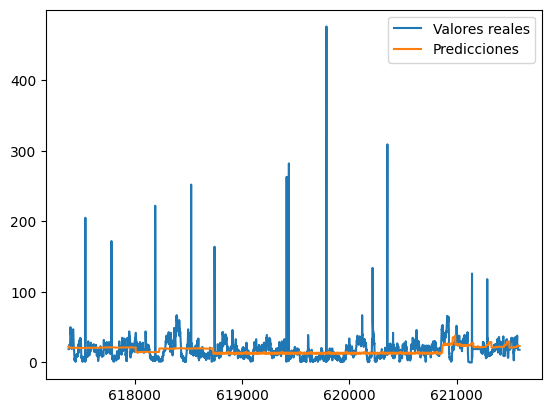

In [19]:
import pandas as pd
import json
import pickle
import os
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")

# Convertir la columna de fecha a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])

# Extraer características temporales
data["hour"] = data["Measurement date"].dt.hour
data["month"] = data["Measurement date"].dt.month
data["weekday"] = data["Measurement date"].dt.weekday
data["is_weekend"] = data["weekday"].isin([5, 6]).astype(int)



# Definir las estaciones y los contaminantes
stations = {
    "206": ("SO2", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "211": ("NO2", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "217": ("O3", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "219": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "225": ("PM10", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "228": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

# Iterar sobre cada estación y contaminante
for station_code, (pollutant, start_date, end_date) in stations.items():
    # Filtrar los datos para la estación y contaminante
    station_data = data[(data['Station code'] == int(station_code)) & (data[pollutant] >= 0)].copy()
    
    if station_data.empty:
        print(f"No hay datos suficientes para la estación {station_code} y contaminante {pollutant}")
        continue

    # Extraer características temporales
    station_data['day'] = station_data['Measurement date'].dt.day

    # Definir X (características) y y (target)
    X = station_data[['hour', 'day', 'weekday', 'month']]
    y = station_data[pollutant]

    # División de datos en series temporales
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear el modelo
    model = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular R2
    r2 = r2_score(y_test, y_pred)
    print(f'R² para estación {station_code} y contaminante {pollutant}: {r2:.4f}')

    # Predicción para el período solicitado
    period_start = pd.to_datetime(start_date)
    period_end = pd.to_datetime(end_date)
    date_range = pd.date_range(start=period_start, end=period_end, freq='H')

    # Crear DataFrame con características temporales para predicción
    forecast_data = pd.DataFrame({'Measurement date': date_range})
    forecast_data['hour'] = forecast_data['Measurement date'].dt.hour
    forecast_data['day'] = forecast_data['Measurement date'].dt.day
    forecast_data['weekday'] = forecast_data['Measurement date'].dt.weekday
    forecast_data['month'] = forecast_data['Measurement date'].dt.month

    # Generar predicciones
    predictions = model.predict(forecast_data[['hour', 'day', 'weekday', 'month']])

    # Guardar las predicciones en el diccionario de salida
    output["target"][station_code] = dict(zip(forecast_data['Measurement date'].astype(str), predictions))

    # Guardar el modelo entrenado
    model_filename = f"models/model_task_2_station_{station_code}.pkl"
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)

# Guardar las predicciones en un archivo JSON
output_filename = "predictions/predictions_task_2.json"
os.makedirs(os.path.dirname(output_filename), exist_ok=True)
with open(output_filename, 'w') as f:
    json.dump(output, f, indent=4)

# Imprimir el resultado
print(f"Predicciones guardadas en {output_filename}")

# Comparar predicciones y valores reales (si tienes los datos reales)
import matplotlib.pyplot as plt
plt.plot(y_test.index, y_test, label='Valores reales')
plt.plot(y_test.index, y_pred, label='Predicciones')
plt.legend()
plt.show()

In [14]:
data.describe()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,hour,month,weekday,is_weekend
count,621588,621588.000000,621588.000000,621588.000000,621588.00000,621588.000000,621588.000000,621588.000000,621588.000000,621588.000000,621588.000000,621588.000000,621588.000000,621588.000000
mean,2022-06-07 10:28:53.506438400,215.980915,37.554003,126.988930,-0.00135,0.022904,0.018718,0.508598,43.978420,25.504612,11.502167,6.384998,3.006083,0.287827
min,2021-01-01 00:00:00,204.000000,37.452357,126.835151,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
25%,2021-09-16 23:00:00,210.000000,37.517528,126.927102,0.00300,0.016000,0.009000,0.300000,22.000000,11.000000,6.000000,3.000000,1.000000,0.000000
50%,2022-06-02 23:00:00,216.000000,37.544962,127.004850,0.00400,0.025000,0.021000,0.500000,35.000000,19.000000,12.000000,6.000000,3.000000,0.000000
75%,2023-02-17 00:00:00,222.000000,37.584848,127.047470,0.00500,0.038000,0.035000,0.600000,53.000000,31.000000,17.000000,9.000000,5.000000,1.000000
max,2023-12-31 23:00:00,228.000000,37.658774,127.136792,3.73600,38.445000,33.600000,71.700000,3586.000000,6256.000000,23.000000,12.000000,6.000000,1.000000
std,NaN,7.192600,0.053397,0.078829,0.07622,0.114483,0.097799,0.399569,71.664738,43.760796,6.919942,3.414417,2.002286,0.452751


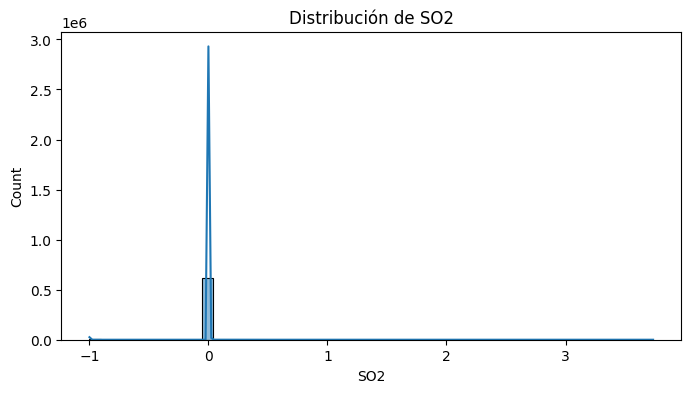

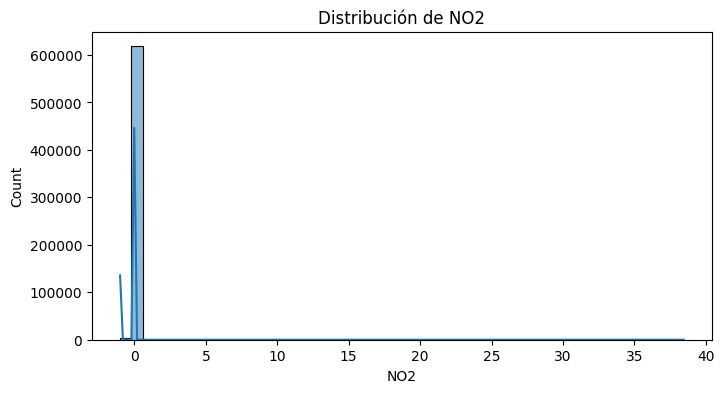

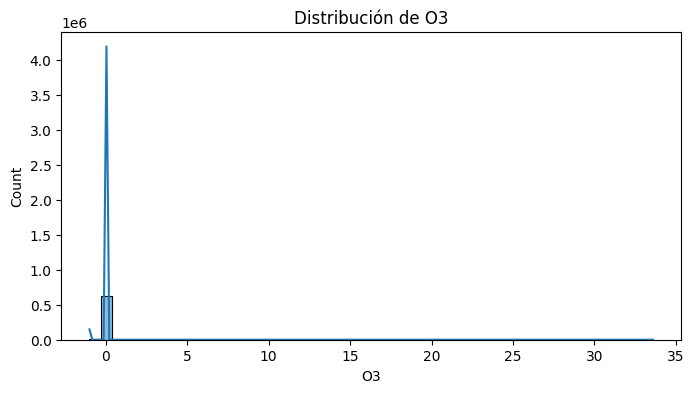

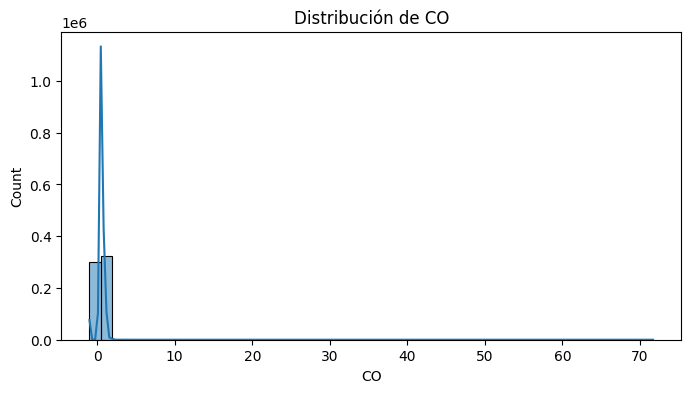

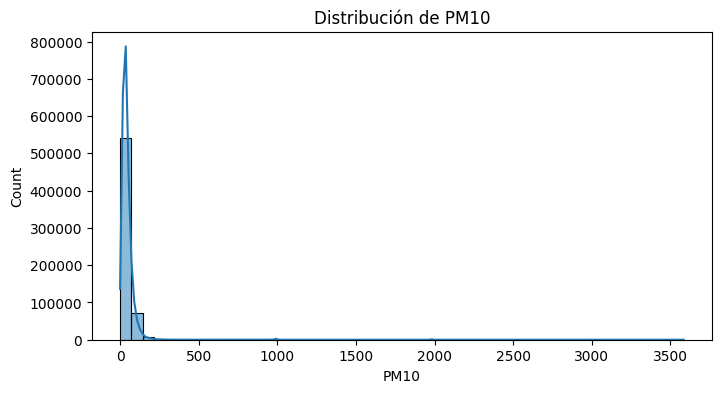

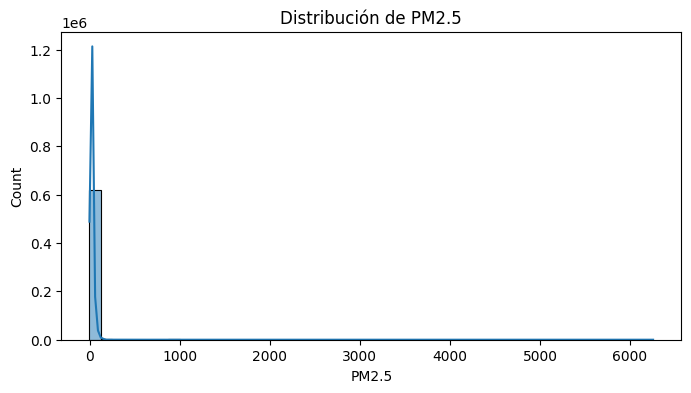

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de las distribuciones
contaminantes = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

for contaminante in contaminantes:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[contaminante], kde=True, bins=50)
    plt.title(f"Distribución de {contaminante}")
    plt.show()


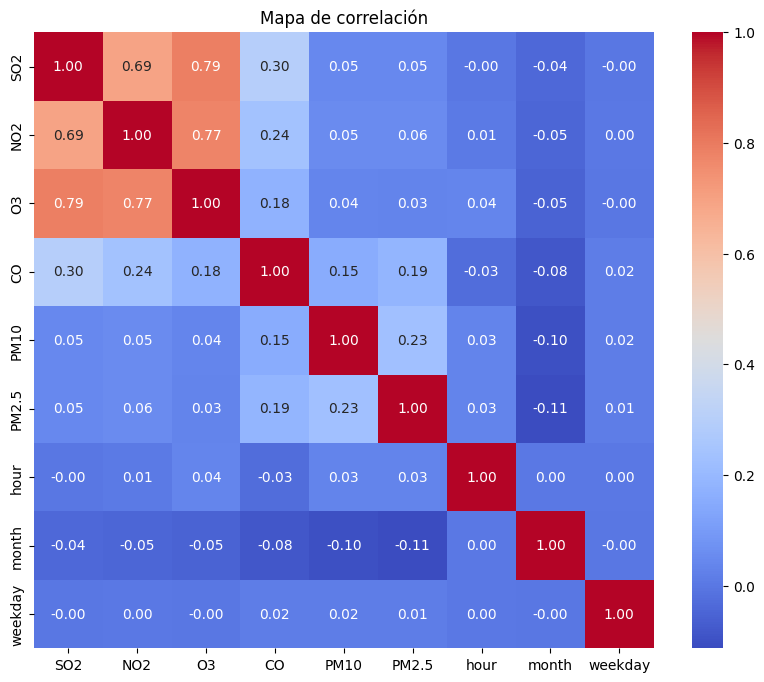

In [31]:
corr_matrix = data[contaminantes + ['hour', 'month', 'weekday']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de correlación")
plt.show()


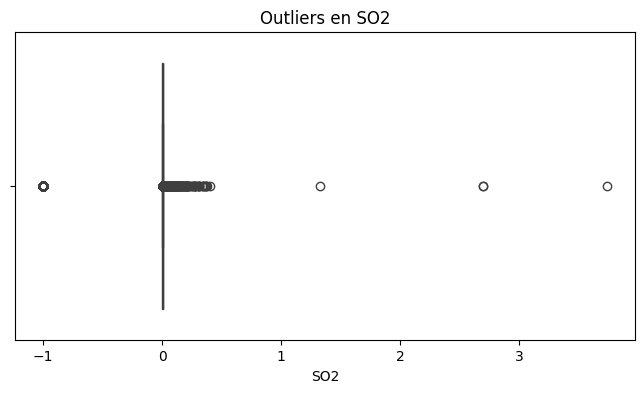

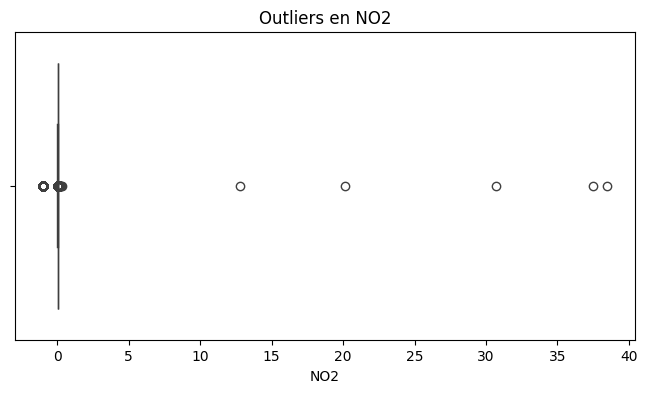

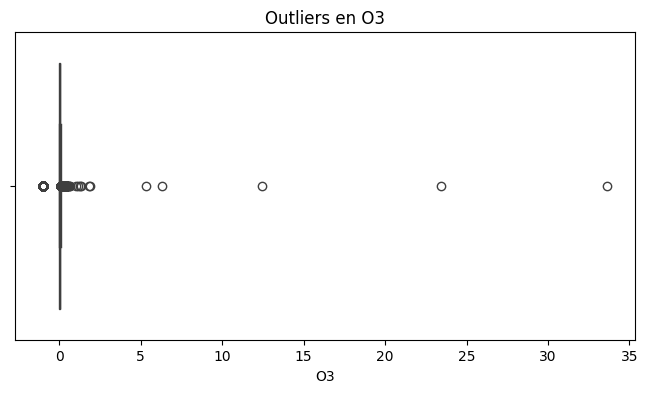

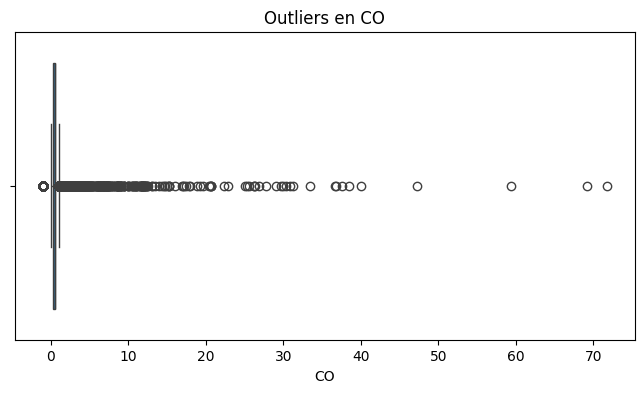

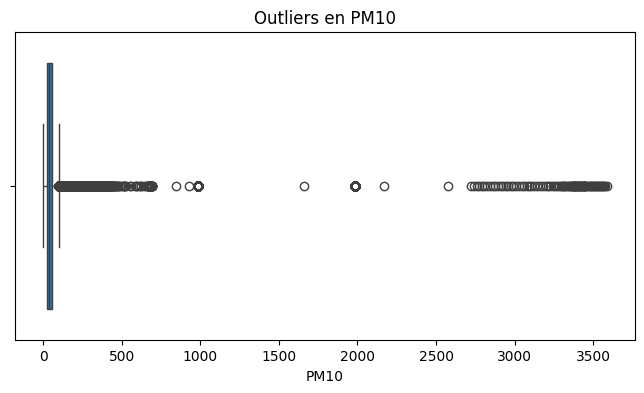

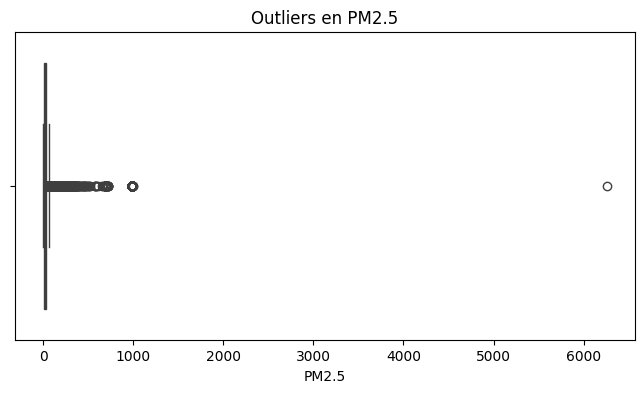

In [32]:
for contaminante in contaminantes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[contaminante])
    plt.title(f"Outliers en {contaminante}")
    plt.show()



# Task 2 fechas cíclicas: 284

In [18]:
import pandas as pd
import json
import pickle
import os
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")

# Convertir la columna de fecha a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])

# Extraer características temporales
data["hour"] = data["Measurement date"].dt.hour
data["month"] = data["Measurement date"].dt.month
data["weekday"] = data["Measurement date"].dt.weekday
data["is_weekend"] = data["weekday"].isin([5, 6]).astype(int)

# Crear características cíclicas para 'hour', 'month', 'weekday'
data['hour_sin'] = np.sin(data['hour'] * (2 * np.pi / 24))
data['hour_cos'] = np.cos(data['hour'] * (2 * np.pi / 24))

data['month_sin'] = np.sin(data['month'] * (2 * np.pi / 12))
data['month_cos'] = np.cos(data['month'] * (2 * np.pi / 12))

data['weekday_sin'] = np.sin(data['weekday'] * (2 * np.pi / 7))
data['weekday_cos'] = np.cos(data['weekday'] * (2 * np.pi / 7))

# Eliminar columnas originales de fecha para evitar redundancia
data.drop(columns=["hour", "month", "weekday"], inplace=True)

# Definir las estaciones y los contaminantes
stations = {
    "206": ("SO2", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "211": ("NO2", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "217": ("O3", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "219": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "225": ("PM10", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "228": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

# Iterar sobre cada estación y contaminante
for station_code, (pollutant, start_date, end_date) in stations.items():
    # Filtrar los datos para la estación y contaminante
    station_data = data[(data['Station code'] == int(station_code)) & (data[pollutant] >= 0)].copy()
    
    if station_data.empty:
        print(f"No hay datos suficientes para la estación {station_code} y contaminante {pollutant}")
        continue

    # Extraer características temporales adicionales
    station_data['day'] = station_data['Measurement date'].dt.day

    # Definir X (características) y y (target)
    X = station_data[['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos', 'day']]
    y = station_data[pollutant]

    # División de datos en series temporales
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear el modelo
    model = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular R2
    r2 = r2_score(y_test, y_pred)
    print(f'R² para estación {station_code} y contaminante {pollutant}: {r2:.4f}')

    # Predicción para el período solicitado
    period_start = pd.to_datetime(start_date)
    period_end = pd.to_datetime(end_date)
    date_range = pd.date_range(start=period_start, end=period_end, freq='H')

    # Crear DataFrame con características temporales para predicción
    forecast_data = pd.DataFrame({'Measurement date': date_range})
    forecast_data['hour'] = forecast_data['Measurement date'].dt.hour
    forecast_data['weekday'] = forecast_data['Measurement date'].dt.weekday
    forecast_data['month'] = forecast_data['Measurement date'].dt.month
    forecast_data['day'] = forecast_data['Measurement date'].dt.day

    # Generar las características cíclicas
    forecast_data['hour_sin'] = np.sin(forecast_data['hour'] * (2 * np.pi / 24))
    forecast_data['hour_cos'] = np.cos(forecast_data['hour'] * (2 * np.pi / 24))

    forecast_data['month_sin'] = np.sin(forecast_data['month'] * (2 * np.pi / 12))
    forecast_data['month_cos'] = np.cos(forecast_data['month'] * (2 * np.pi / 12))

    forecast_data['weekday_sin'] = np.sin(forecast_data['weekday'] * (2 * np.pi / 7))
    forecast_data['weekday_cos'] = np.cos(forecast_data['weekday'] * (2 * np.pi / 7))

    # Generar predicciones
    predictions = model.predict(forecast_data[['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos', 'day']])

    # Guardar las predicciones en el diccionario de salida
    output["target"][station_code] = dict(zip(forecast_data['Measurement date'].astype(str), predictions))

    # Guardar el modelo entrenado
    model_filename = f"models/model_task_2_station_{station_code}.pkl"
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)

# Guardar las predicciones en un archivo JSON
output_filename = "predictions/predictions_task_2.json"
os.makedirs(os.path.dirname(output_filename), exist_ok=True)
with open(output_filename, 'w') as f:
    json.dump(output, f, indent=4)

# Imprimir el resultado
print(f"Predicciones guardadas en {output_filename}")


R² para estación 206 y contaminante SO2: -0.2547
R² para estación 211 y contaminante NO2: 0.3160
R² para estación 217 y contaminante O3: 0.3578
R² para estación 219 y contaminante CO: -0.0928
R² para estación 225 y contaminante PM10: -0.0730
R² para estación 228 y contaminante PM2.5: -0.0024
Predicciones guardadas en predictions/predictions_task_2.json


# Task 3

In [109]:
print(data.columns,"dataset: data")
print(instrument_data.columns, "dataset: instrument")
print(pollutant_data.columns, "dataset: pollutant")


Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5', 'hour', 'month', 'weekday',
       'is_weekend'],
      dtype='object') dataset: data
Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status'],
      dtype='object') dataset: instrument
Index(['Item code', 'Item name', 'Unit of measurement', 'Good', 'Normal',
       'Bad', 'Very bad'],
      dtype='object') dataset: pollutant


In [131]:
instrument_data["Instrument status"]

0          0
1          0
2          0
3          0
4          0
          ..
3703657    0
3703658    0
3703659    0
3703660    0
3703661    0
Name: Instrument status, Length: 3703662, dtype: int64

In [132]:
print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)


Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64


# Usando un modelo 80

In [136]:
import pandas as pd
import json
import pickle
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")
instrument_data = pd.read_csv("data/raw/instrument_data.csv", parse_dates=['Measurement date'])

# Convertir fechas a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])
instrument_data['Measurement date'] = pd.to_datetime(instrument_data['Measurement date'])

# Realizar el merge entre data e instrument_data
merged_data = pd.merge(data, instrument_data, 
                       on=['Station code', 'Measurement date'], 
                       how='inner')

print(f"Datos combinados: {merged_data.shape[0]} filas, {merged_data.shape[1]} columnas")

# Extraer características temporales
merged_data["hour"] = merged_data["Measurement date"].dt.hour
merged_data["month"] = merged_data["Measurement date"].dt.month
merged_data["weekday"] = merged_data["Measurement date"].dt.weekday
merged_data["is_weekend"] = merged_data["weekday"].isin([5, 6]).astype(int)

print("Valores nulos en 'Instrument status' después del merge:")
print(merged_data['Instrument status'].isna().sum())

# Definir las estaciones y contaminantes con sus períodos
stations = {
    "205": ("SO2", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "209": ("NO2", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "223": ("O3", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "224": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "226": ("PM10", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "227": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

# Iterar sobre cada estación y contaminante
for station_code, (pollutant, start_date, end_date) in stations.items():
    print(f"\nProcesando estación {station_code} con contaminante {pollutant}")

    # Filtrar datos por estación y contaminante
    station_data = merged_data[(merged_data['Station code'] == int(station_code)) & 
                               (merged_data[pollutant] >= 0)].copy()

    if station_data.empty:
        print(f"No hay datos suficientes para la estación {station_code} y contaminante {pollutant}")
        continue

    # Definir el período de entrenamiento (1 año antes del período de predicción)
    train_start = pd.to_datetime(start_date) - pd.DateOffset(years=1)
    train_end = pd.to_datetime(start_date) - pd.DateOffset(hours=1)
    
    train_data = station_data[(station_data['Measurement date'] >= train_start) &
                              (station_data['Measurement date'] <= train_end)]
    
    if train_data.empty:
        print(f"No hay datos históricos suficientes para entrenar el modelo en la estación {station_code}")
        continue

    print(f"Datos de entrenamiento disponibles: {train_data.shape[0]} filas")

    # Definir X (características) y y (target) con datos históricos
    X = train_data[['hour', 'weekday', 'month']]
    y = train_data['Instrument status']

    if y.isnull().all():
        print(f"No hay datos de 'Instrument status' para la estación {station_code}. No se entrenará el modelo.")
        continue

    # Verificar si hay suficientes datos
    if X.shape[0] < 10:
        print(f"No hay suficientes datos para entrenar el modelo en la estación {station_code}")
        continue

    # División de datos en series temporales
    tscv = TimeSeriesSplit(n_splits=5)
    best_split = None
    
    for train_index, test_index in tscv.split(X):
        best_split = (train_index, test_index)
    
    if best_split is None:
        print(f"No se pudo dividir el conjunto de datos para la estación {station_code}")
        continue
    
    train_index, test_index = best_split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Datos divididos: {X_train.shape[0]} entrenamiento, {X_test.shape[0]} prueba")

    # Crear y entrenar el modelo
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    print(f"Modelo entrenado para la estación {station_code}")

    # Evaluar el modelo
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'F1 Score: {f1:.4f}')

    # Generar predicciones para el período solicitado
    date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')
    forecast_data = pd.DataFrame({'Measurement date': date_range})
    forecast_data['hour'] = forecast_data['Measurement date'].dt.hour
    forecast_data['weekday'] = forecast_data['Measurement date'].dt.weekday
    forecast_data['month'] = forecast_data['Measurement date'].dt.month

    predictions = model.predict(forecast_data[['hour', 'weekday', 'month']])

    # Guardar predicciones
    output["target"][station_code] = {str(date): int(pred) for date, pred in zip(forecast_data['Measurement date'], predictions)}

    # Guardar el modelo entrenado
    model_filename = f"models/model_task_3_station_{station_code}.pkl"
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)

# Guardar las predicciones en un archivo JSON
output_filename = "predictions/predictions_task_3.json"
os.makedirs(os.path.dirname(output_filename), exist_ok=True)
with open(output_filename, 'w') as f:
    json.dump(output, f, indent=4)

print(f"Predicciones guardadas en {output_filename}")


Datos combinados: 3703662 filas, 13 columnas
Valores nulos en 'Instrument status' después del merge:
0

Procesando estación 205 con contaminante SO2
Datos de entrenamiento disponibles: 50382 filas
Datos divididos: 41985 entrenamiento, 8397 prueba
Modelo entrenado para la estación 205
F1 Score: 0.2492

Procesando estación 209 con contaminante NO2
Datos de entrenamiento disponibles: 50754 filas
Datos divididos: 42295 entrenamiento, 8459 prueba


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_11380\999231264.py:112: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')


Modelo entrenado para la estación 209
F1 Score: 0.1971

Procesando estación 223 con contaminante O3
Datos de entrenamiento disponibles: 50874 filas
Datos divididos: 42395 entrenamiento, 8479 prueba


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_11380\999231264.py:112: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')


Modelo entrenado para la estación 223
F1 Score: 0.3320

Procesando estación 224 con contaminante CO
Datos de entrenamiento disponibles: 47538 filas
Datos divididos: 39615 entrenamiento, 7923 prueba


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_11380\999231264.py:112: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')


Modelo entrenado para la estación 224
F1 Score: 0.1532

Procesando estación 226 con contaminante PM10
Datos de entrenamiento disponibles: 50766 filas
Datos divididos: 42305 entrenamiento, 8461 prueba


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_11380\999231264.py:112: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')


Modelo entrenado para la estación 226
F1 Score: 0.1993

Procesando estación 227 con contaminante PM2.5
Datos de entrenamiento disponibles: 50298 filas
Datos divididos: 41915 entrenamiento, 8383 prueba


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_11380\999231264.py:112: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')


Modelo entrenado para la estación 227
F1 Score: 0.3318
Predicciones guardadas en predictions/predictions_task_3.json


C:\Users\Jjaavviieerroperro\AppData\Local\Temp\ipykernel_11380\999231264.py:112: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')


In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import json

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")
instrument_data = pd.read_csv("data/raw/instrument_data.csv", parse_dates=['Measurement date'])

print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)

# Convertir fechas a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])
instrument_data['Measurement date'] = pd.to_datetime(instrument_data['Measurement date'])

# Realizar el merge entre data e instrument_data
merged_data = pd.merge(data, instrument_data, on=['Station code', 'Measurement date'], how='inner')

# Extraer características temporales
merged_data["hour"] = merged_data["Measurement date"].dt.hour
merged_data["month"] = merged_data["Measurement date"].dt.month
merged_data["weekday"] = merged_data["Measurement date"].dt.weekday
merged_data["is_weekend"] = merged_data["weekday"].isin([5, 6]).astype(int)

# Definir las estaciones y contaminantes con sus períodos
stations = {
    "205": ("SO2", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "209": ("NO2", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "223": ("O3", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "224": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "226": ("PM10", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "227": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

for station_code, (pollutant, start_date, end_date) in stations.items():
    print(f"\nProcesando estación {station_code} con contaminante {pollutant}")
    station_data = merged_data[(merged_data['Station code'] == int(station_code)) & (merged_data[pollutant] >= 0)].copy()
    
    if station_data.empty:
        continue
    
    # Escalar las características
    features = ['hour', 'weekday', 'month', pollutant]
    scaler = StandardScaler()
    station_data[features] = scaler.fit_transform(station_data[features])
    
    # Aplicar Isolation Forest para detectar anomalías
    iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Ajustar contaminación
    station_data['anomaly'] = iso_forest.fit_predict(station_data[features])
    station_data['anomaly'] = np.where(station_data['anomaly'] == -1, 1, 0)
    
    # Filtrar anomalías detectadas
    anomalies = station_data[station_data['anomaly'] == 1].copy()
    
    if anomalies.empty:
        print("No se detectaron anomalías.")
        continue
    
    # Evaluar eficacia de Isolation Forest con F1 Score
    if 'Instrument status' in station_data.columns:
        y_true = station_data['Instrument status']
        y_pred = station_data['anomaly']
        print(f"F1 Score para anomalías detectadas en estación {station_code}: {f1_score(y_true, y_pred, average='macro'):.4f}")
    else:
        print("No se puede calcular F1 Score debido a la falta de 'Instrument status' en los datos.")
    
    # Almacenar predicciones de anomalías
    output["target"][station_code] = {str(date): int(pred) for date, pred in zip(station_data['Measurement date'], station_data['anomaly'])}


Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64

Procesando estación 205 con contaminante SO2
F1 Score para anomalías detectadas en estación 205: 0.2105

Procesando estación 209 con contaminante NO2
F1 Score para anomalías detectadas en estación 209: 0.1638

Procesando estación 223 con contaminante O3
F1 Score para anomalías detectadas en estación 223: 0.2000

Procesando estación 224 con contaminante CO
F1 Score para anomalías detectadas en estación 224: 0.1685

Procesando estación 226 con contaminante PM10
F1 Score para anomalías detectadas en estación 226: 0.1819

Procesando estación 227 con contaminante PM2.5
F1 Score para anomalías detectadas en estación 227: 0.1693


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import json

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")
instrument_data = pd.read_csv("data/raw/instrument_data.csv", parse_dates=['Measurement date'])
pollutant_data = pd.read_csv("data/raw/pollutant_data.csv")

print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)

# Convertir fechas a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])
instrument_data['Measurement date'] = pd.to_datetime(instrument_data['Measurement date'])

# Realizar el merge entre data, instrument_data y pollutant_data
merged_data = pd.merge(data, instrument_data, on=['Station code', 'Measurement date'], how='inner')
merged_data = pd.merge(merged_data, pollutant_data, on='Item code', how='left')

# Extraer características temporales
merged_data["hour"] = merged_data["Measurement date"].dt.hour
merged_data["month"] = merged_data["Measurement date"].dt.month
merged_data["weekday"] = merged_data["Measurement date"].dt.weekday
merged_data["is_weekend"] = merged_data["weekday"].isin([5, 6]).astype(int)

# Crear nuevas características
# Promedio móvil de 3 horas para los contaminantes
for pollutant in ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']:
    merged_data[f'{pollutant}_rolling_mean'] = merged_data[pollutant].rolling(window=3).mean()

# Relación entre contaminantes
merged_data['SO2_NO2'] = merged_data['SO2'] / (merged_data['NO2'] + 1e-5)  # Agregar un pequeño valor para evitar división por 0
merged_data['O3_PM10'] = merged_data['O3'] / (merged_data['PM10'] + 1e-5)
merged_data['SO2_O3'] = merged_data['SO2'] / (merged_data['O3'] + 1e-5)

# Clasificar el `Instrument status` en binario (0 -> Normal, 1 -> Anómalo)
merged_data['instrument_status_binary'] = np.where(merged_data['Instrument status'] == 0, 0, 1)

# Definir las estaciones y contaminantes con sus períodos
stations = {
    "205": ("SO2", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "209": ("NO2", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "223": ("O3", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "224": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "226": ("PM10", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "227": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

for station_code, (pollutant, start_date, end_date) in stations.items():
    print(f"\nProcesando estación {station_code} con contaminante {pollutant}")
    station_data = merged_data[(merged_data['Station code'] == int(station_code)) & (merged_data[pollutant] >= 0)].copy()
    
    if station_data.empty:
        continue
    
    # Escalar las características
    features = ['hour', 'weekday', 'month', 'is_weekend', f'{pollutant}_rolling_mean', 'SO2_NO2', 'O3_PM10', 'SO2_O3']
    scaler = StandardScaler()
    station_data[features] = scaler.fit_transform(station_data[features])
    
    # Aplicar Isolation Forest para detectar anomalías
    iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Ajustar contaminación
    station_data['anomaly'] = iso_forest.fit_predict(station_data[features])
    station_data['anomaly'] = np.where(station_data['anomaly'] == -1, 1, 0)
    
    # Filtrar anomalías detectadas
    anomalies = station_data[station_data['anomaly'] == 1].copy()
    
    if anomalies.empty:
        print("No se detectaron anomalías.")
        continue
    
    # Evaluar eficacia de Isolation Forest con F1 Score
    if 'instrument_status_binary' in station_data.columns:
        y_true = station_data['instrument_status_binary']
        y_pred = station_data['anomaly']
        print(f"F1 Score para anomalías detectadas en estación {station_code}: {f1_score(y_true, y_pred, average='macro'):.4f}")
    else:
        print("No se puede calcular F1 Score debido a la falta de 'Instrument status' en los datos.")
    
    # Almacenar predicciones de anomalías
    output["target"][station_code] = {str(date): int(pred) for date, pred in zip(station_data['Measurement date'], station_data['anomaly'])}


Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64

Procesando estación 205 con contaminante SO2
F1 Score para anomalías detectadas en estación 205: 0.5364

Procesando estación 209 con contaminante NO2
F1 Score para anomalías detectadas en estación 209: 0.5251

Procesando estación 223 con contaminante O3
F1 Score para anomalías detectadas en estación 223: 0.5663

Procesando estación 224 con contaminante CO
F1 Score para anomalías detectadas en estación 224: 0.5471

Procesando estación 226 con contaminante PM10
F1 Score para anomalías detectadas en estación 226: 0.5712

Procesando estación 227 con contaminante PM2.5
F1 Score para anomalías detectadas en estación 227: 0.7044


# Mas pruebas (usando dos modelos 89)

In [34]:
import pandas as pd
import json
import pickle
import os
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")
instrument_data = pd.read_csv("data/raw/instrument_data.csv", parse_dates=['Measurement date'])

print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)

# Convertir fechas a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])
instrument_data['Measurement date'] = pd.to_datetime(instrument_data['Measurement date'])

# Realizar el merge entre data e instrument_data
merged_data = pd.merge(data, instrument_data, on=['Station code', 'Measurement date'], how='inner')

# Extraer características temporales
merged_data["hour"] = merged_data["Measurement date"].dt.hour
merged_data["month"] = merged_data["Measurement date"].dt.month
merged_data["weekday"] = merged_data["Measurement date"].dt.weekday
merged_data["is_weekend"] = merged_data["weekday"].isin([5, 6]).astype(int)

# Crear nuevas características
# Promedio móvil de 3 horas para los contaminantes
for pollutant in ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']:
    merged_data[f'{pollutant}_rolling_mean'] = merged_data[pollutant].rolling(window=3).mean()

# Relación entre contaminantes
merged_data['SO2_NO2'] = merged_data['SO2'] / (merged_data['NO2'] + 1e-5)  # Agregar un pequeño valor para evitar división por 0
merged_data['O3_PM10'] = merged_data['O3'] / (merged_data['PM10'] + 1e-5)
merged_data['SO2_O3'] = merged_data['SO2'] / (merged_data['O3'] + 1e-5)

# Clasificar el `Instrument status` en binario (0 -> Normal, 1 -> Anómalo)
merged_data['instrument_status_binary'] = np.where(merged_data['Instrument status'] == 0, 0, 1)


# Definir las estaciones y contaminantes con sus períodos
stations = {
    "205": ("SO2", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "209": ("NO2", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "223": ("O3", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "224": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "226": ("PM10", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "227": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

for station_code, (pollutant, start_date, end_date) in stations.items():
    print(f"\nProcesando estación {station_code} con contaminante {pollutant}")
    station_data = merged_data[(merged_data['Station code'] == int(station_code)) & (merged_data[pollutant] >= 0)].copy()
    
    if station_data.empty:
        continue
    
    # Aplicar Isolation Forest para detectar anomalías
    features = ['hour', 'weekday', 'month', pollutant]
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    station_data['anomaly'] = iso_forest.fit_predict(station_data[features])
    station_data['anomaly'] = np.where(station_data['anomaly'] == -1, 1, 0)
    
    # Filtrar anomalías detectadas
    anomalies = station_data[station_data['anomaly'] == 1].copy()
    if anomalies.empty:
        continue
    
    # Entrenar modelo multiclase para clasificar anomalías
    X_anomalies = anomalies[features]
    y_anomalies = anomalies['Instrument status']
    if y_anomalies.isnull().all():
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(X_anomalies, y_anomalies, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Clasificación de anomalías - F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    
    # Predecir anomalías en el período solicitado
    date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')
    forecast_data = pd.DataFrame({'Measurement date': date_range})
    forecast_data['hour'] = forecast_data['Measurement date'].dt.hour
    forecast_data['weekday'] = forecast_data['Measurement date'].dt.weekday
    forecast_data['month'] = forecast_data['Measurement date'].dt.month
    forecast_data[pollutant] = 0  # Se podría usar un valor estimado o promedio
    
    # Aplicar Isolation Forest en los datos futuros
    forecast_data['anomaly'] = iso_forest.predict(forecast_data[features])
    forecast_data['anomaly'] = np.where(forecast_data['anomaly'] == -1, 1, 0)
    
    anomalous_data = forecast_data[forecast_data['anomaly'] == 1].copy()
    if not anomalous_data.empty:
        anomalous_data['anomaly_type'] = clf.predict(anomalous_data[features])
    
    final_results = forecast_data.merge(anomalous_data[['Measurement date', 'anomaly_type']], on='Measurement date', how='left')
    output["target"][station_code] = {str(date): int(pred) if not np.isnan(pred) else 0 for date, pred in zip(final_results['Measurement date'], final_results['anomaly_type'].fillna(0))}
    
    # Guardar modelo
    model_filename = f"models/model_task_3_station_{station_code}.pkl"
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    with open(model_filename, 'wb') as f:
        pickle.dump(clf, f)

# Guardar predicciones
output_filename = "predictions/predictions_task_3.json"
os.makedirs(os.path.dirname(output_filename), exist_ok=True)
with open(output_filename, 'w') as f:
    json.dump(output, f, indent=4)

print(f"Predicciones guardadas en {output_filename}")
print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)


Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64

Procesando estación 205 con contaminante SO2
Clasificación de anomalías - F1 Score: 0.8679

Procesando estación 209 con contaminante NO2
Clasificación de anomalías - F1 Score: 0.5862

Procesando estación 223 con contaminante O3
Clasificación de anomalías - F1 Score: 0.4417

Procesando estación 224 con contaminante CO
Clasificación de anomalías - F1 Score: 0.4383

Procesando estación 226 con contaminante PM10
Clasificación de anomalías - F1 Score: 0.4633

Procesando estación 227 con contaminante PM2.5
Clasificación de anomalías - F1 Score: 0.5926
Predicciones guardadas en predictions/predictions_task_3.json
Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64


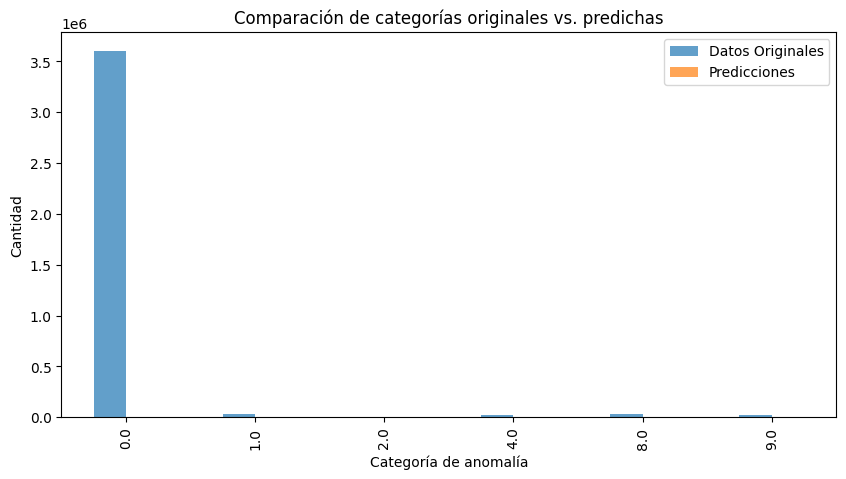

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las categorías originales
original_counts = merged_data['Instrument status'].value_counts()

# Contar las predicciones del modelo multiclase
predicted_counts = pd.Series(output["target"]).apply(lambda x: pd.Series(x.values())).stack().value_counts()

# Crear un DataFrame para comparar
comparison_df = pd.DataFrame({
    "Original": original_counts,
    "Predicted": predicted_counts
}).fillna(0)

# Graficar
comparison_df.plot(kind='bar', figsize=(10,5), alpha=0.7)
plt.title("Comparación de categorías originales vs. predichas")
plt.xlabel("Categoría de anomalía")
plt.ylabel("Cantidad")
plt.legend(["Datos Originales", "Predicciones"])
plt.show()


In [6]:
original_counts = merged_data['Instrument status'].value_counts()
print("Cantidad de datos originales por categoría:")
print(original_counts)


Cantidad de datos originales por categoría:
Instrument status
0    3606696
8      28323
1      27147
9      19668
4      17960
2       3868
Name: count, dtype: int64


In [7]:
predicted_counts = pd.Series(output["target"]).apply(lambda x: pd.Series(x.values())).stack().value_counts()
print("\nCantidad de datos predichos por categoría:")
print(predicted_counts)



Cantidad de datos predichos por categoría:
0.0    3707
4.0     293
1.0     254
8.0     162
Name: count, dtype: int64


In [9]:
# Crear DataFrame de comparación
comparison_df = pd.DataFrame({
    "Original": original_counts,
    "Predicted": predicted_counts
}).fillna(0)

# Calcular porcentaje de predicciones sobre el total original
comparison_df["% Predicho vs. Original"] = (comparison_df["Predicted"] / comparison_df["Original"]) * 100

# Mostrar la tabla de comparación
print("\nComparación de datos originales vs. predichos:")
print(comparison_df)



Comparación de datos originales vs. predichos:
     Original  Predicted  % Predicho vs. Original
0.0   3606696     3707.0                 0.102781
1.0     27147      254.0                 0.935647
2.0      3868        0.0                 0.000000
4.0     17960      293.0                 1.631403
8.0     28323      162.0                 0.571973
9.0     19668        0.0                 0.000000


# Hemos añadido max_depth=5 y parametros al isolation 63

In [31]:
import pandas as pd
import json
import pickle
import os
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")
instrument_data = pd.read_csv("data/raw/instrument_data.csv", parse_dates=['Measurement date'])

print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)

# Convertir fechas a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])
instrument_data['Measurement date'] = pd.to_datetime(instrument_data['Measurement date'])

# Realizar el merge entre data e instrument_data
merged_data = pd.merge(data, instrument_data, on=['Station code', 'Measurement date'], how='inner')

# Extraer características temporales
merged_data["hour"] = merged_data["Measurement date"].dt.hour
merged_data["month"] = merged_data["Measurement date"].dt.month
merged_data["weekday"] = merged_data["Measurement date"].dt.weekday
merged_data["is_weekend"] = merged_data["weekday"].isin([5, 6]).astype(int)

# Definir las estaciones y contaminantes con sus períodos
stations = {
    "205": ("SO2", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "209": ("NO2", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "223": ("O3", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "224": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "226": ("PM10", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "227": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

for station_code, (pollutant, start_date, end_date) in stations.items():
    print(f"\nProcesando estación {station_code} con contaminante {pollutant}")
    station_data = merged_data[(merged_data['Station code'] == int(station_code)) & (merged_data[pollutant] >= 0)].copy()
    
    if station_data.empty:
        continue
    
    # Aplicar Isolation Forest para detectar anomalías
    features = ['hour', 'weekday', 'month', pollutant]
    iso_forest = IsolationForest(contamination=0.02, n_estimators=200, max_samples=0.8, random_state=42)
    station_data['anomaly'] = iso_forest.fit_predict(station_data[features])
    station_data['anomaly'] = np.where(station_data['anomaly'] == -1, 1, 0)
    
    # Filtrar anomalías detectadas
    anomalies = station_data[station_data['anomaly'] == 1].copy()
    if anomalies.empty:
        continue
    
    # Entrenar modelo multiclase para clasificar anomalías
    X_anomalies = anomalies[features]
    y_anomalies = anomalies['Instrument status']
    if y_anomalies.isnull().all():
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(X_anomalies, y_anomalies, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Clasificación de anomalías - F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    
    # Predecir anomalías en el período solicitado
    date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')
    forecast_data = pd.DataFrame({'Measurement date': date_range})
    forecast_data['hour'] = forecast_data['Measurement date'].dt.hour
    forecast_data['weekday'] = forecast_data['Measurement date'].dt.weekday
    forecast_data['month'] = forecast_data['Measurement date'].dt.month
    forecast_data[pollutant] = 0  # Se podría usar un valor estimado o promedio
    
    # Aplicar Isolation Forest en los datos futuros
    forecast_data['anomaly'] = iso_forest.predict(forecast_data[features])
    forecast_data['anomaly'] = np.where(forecast_data['anomaly'] == -1, 1, 0)
    
    anomalous_data = forecast_data[forecast_data['anomaly'] == 1].copy()
    if not anomalous_data.empty:
        anomalous_data['anomaly_type'] = clf.predict(anomalous_data[features])
    
    final_results = forecast_data.merge(anomalous_data[['Measurement date', 'anomaly_type']], on='Measurement date', how='left')
    output["target"][station_code] = {str(date): int(pred) if not np.isnan(pred) else 0 for date, pred in zip(final_results['Measurement date'], final_results['anomaly_type'].fillna(0))}
    
    # Guardar modelo
    model_filename = f"models/model_task_3_station_{station_code}.pkl"
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    with open(model_filename, 'wb') as f:
        pickle.dump(clf, f)

# Guardar predicciones
output_filename = "predictions/predictions_task_3.json"
os.makedirs(os.path.dirname(output_filename), exist_ok=True)
with open(output_filename, 'w') as f:
    json.dump(output, f, indent=4)

print(f"Predicciones guardadas en {output_filename}")
print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)

Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64

Procesando estación 205 con contaminante SO2
Clasificación de anomalías - F1 Score: 0.7819

Procesando estación 209 con contaminante NO2
Clasificación de anomalías - F1 Score: 0.7815

Procesando estación 223 con contaminante O3
Clasificación de anomalías - F1 Score: 0.4909

Procesando estación 224 con contaminante CO
Clasificación de anomalías - F1 Score: 0.5173

Procesando estación 226 con contaminante PM10
Clasificación de anomalías - F1 Score: 0.4269

Procesando estación 227 con contaminante PM2.5
Clasificación de anomalías - F1 Score: 0.5502
Predicciones guardadas en predictions/predictions_task_3.json
Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64


In [14]:
import pandas as pd
import json
import pickle
import os
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")
instrument_data = pd.read_csv("data/raw/instrument_data.csv", parse_dates=['Measurement date'])

print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)

# Convertir fechas a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])
instrument_data['Measurement date'] = pd.to_datetime(instrument_data['Measurement date'])

# Realizar el merge entre data e instrument_data
merged_data = pd.merge(data, instrument_data, on=['Station code', 'Measurement date'], how='inner')

# Extraer características temporales
merged_data["hour"] = merged_data["Measurement date"].dt.hour
merged_data["month"] = merged_data["Measurement date"].dt.month
merged_data["weekday"] = merged_data["Measurement date"].dt.weekday
merged_data["is_weekend"] = merged_data["weekday"].isin([5, 6]).astype(int)

# Definir las estaciones y contaminantes con sus períodos
stations = {
    "205": ("SO2", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "209": ("NO2", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "223": ("O3", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "224": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "226": ("PM10", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "227": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

for station_code, (pollutant, start_date, end_date) in stations.items():
    print(f"\nProcesando estación {station_code} con contaminante {pollutant}")
    station_data = merged_data[(merged_data['Station code'] == int(station_code)) & (merged_data[pollutant] >= 0)].copy()
    
    if station_data.empty:
        continue
    
    # Aplicar Isolation Forest para detectar anomalías
    features = ['hour', 'weekday', 'month', pollutant]
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    station_data['anomaly'] = iso_forest.fit_predict(station_data[features])
    station_data['anomaly'] = np.where(station_data['anomaly'] == -1, 1, 0)
    
    # Filtrar anomalías detectadas
    anomalies = station_data[station_data['anomaly'] == 1].copy()
    if anomalies.empty:
        continue
    
    # Entrenar modelo multiclase para clasificar anomalías
    X_anomalies = anomalies[features]
    y_anomalies = anomalies['Instrument status']
    if y_anomalies.isnull().all():
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(X_anomalies, y_anomalies, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Clasificación de anomalías - F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    
    # Predecir anomalías en el período solicitado
    date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')
    forecast_data = pd.DataFrame({'Measurement date': date_range})
    forecast_data['hour'] = forecast_data['Measurement date'].dt.hour
    forecast_data['weekday'] = forecast_data['Measurement date'].dt.weekday
    forecast_data['month'] = forecast_data['Measurement date'].dt.month
    forecast_data[pollutant] = 0  # Se podría usar un valor estimado o promedio
    
    # Aplicar Isolation Forest en los datos futuros
    forecast_data['anomaly'] = iso_forest.predict(forecast_data[features])
    forecast_data['anomaly'] = np.where(forecast_data['anomaly'] == -1, 1, 0)
    
    anomalous_data = forecast_data[forecast_data['anomaly'] == 1].copy()
    if not anomalous_data.empty:
        anomalous_data['anomaly_type'] = clf.predict(anomalous_data[features])
    
    final_results = forecast_data.merge(anomalous_data[['Measurement date', 'anomaly_type']], on='Measurement date', how='left')
    output["target"][station_code] = {str(date): int(pred) if not np.isnan(pred) else 0 for date, pred in zip(final_results['Measurement date'], final_results['anomaly_type'].fillna(0))}
    
    # Guardar modelo
    model_filename = f"models/model_task_3_station_{station_code}.pkl"
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    with open(model_filename, 'wb') as f:
        pickle.dump(clf, f)

# Guardar predicciones
output_filename = "predictions/predictions_task_3.json"
os.makedirs(os.path.dirname(output_filename), exist_ok=True)
with open(output_filename, 'w') as f:
    json.dump(output, f, indent=4)

print(f"Predicciones guardadas en {output_filename}")
print(instrument_data["Instrument status"].value_counts(normalize=True) * 100)

Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64

Procesando estación 205 con contaminante SO2
Clasificación de anomalías - F1 Score: 0.8679

Procesando estación 209 con contaminante NO2
Clasificación de anomalías - F1 Score: 0.5862

Procesando estación 223 con contaminante O3
Clasificación de anomalías - F1 Score: 0.4417

Procesando estación 224 con contaminante CO
Clasificación de anomalías - F1 Score: 0.4383

Procesando estación 226 con contaminante PM10
Clasificación de anomalías - F1 Score: 0.4633

Procesando estación 227 con contaminante PM2.5
Clasificación de anomalías - F1 Score: 0.5926
Predicciones guardadas en predictions/predictions_task_3.json
Instrument status
0    97.381889
8     0.764730
1     0.732977
9     0.531042
4     0.484925
2     0.104437
Name: proportion, dtype: float64


In [16]:
# Verificar valores únicos de 'Instrument status' antes de mapear
print("Valores únicos de 'Instrument status' antes de mapear:", anomalies['Instrument status'].unique())

# Convertir Instrument status usando el mapeo
anomalies['Instrument status'] = anomalies['Instrument status'].map(status_mapping)

# Verificar si hay valores que no se han mapeado correctamente
print("Valores únicos de 'Instrument status' después de mapear:", anomalies['Instrument status'].unique())


Valores únicos de 'Instrument status' antes de mapear: [0 1 5]
Valores únicos de 'Instrument status' después de mapear: [ 0.  1. nan]


# Fechas cíclicas: 85

In [17]:
import pandas as pd
import numpy as np
import json
import pickle
import os
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Cargar los datos
data = pd.read_csv("data/raw/measurement_data.csv")
instrument_data = pd.read_csv("data/raw/instrument_data.csv", parse_dates=['Measurement date'])

# Convertir fechas a tipo datetime
data['Measurement date'] = pd.to_datetime(data['Measurement date'])
instrument_data['Measurement date'] = pd.to_datetime(instrument_data['Measurement date'])

# Realizar el merge entre data e instrument_data
merged_data = pd.merge(data, instrument_data, on=['Station code', 'Measurement date'], how='inner')

# Extraer características temporales
merged_data["hour"] = merged_data["Measurement date"].dt.hour
merged_data["month"] = merged_data["Measurement date"].dt.month
merged_data["weekday"] = merged_data["Measurement date"].dt.weekday

# Crear características cíclicas para 'hour', 'month', 'weekday'
merged_data['hour_sin'] = np.sin(merged_data['hour'] * (2 * np.pi / 24))
merged_data['hour_cos'] = np.cos(merged_data['hour'] * (2 * np.pi / 24))

merged_data['month_sin'] = np.sin(merged_data['month'] * (2 * np.pi / 12))
merged_data['month_cos'] = np.cos(merged_data['month'] * (2 * np.pi / 12))

merged_data['weekday_sin'] = np.sin(merged_data['weekday'] * (2 * np.pi / 7))
merged_data['weekday_cos'] = np.cos(merged_data['weekday'] * (2 * np.pi / 7))

# Eliminar columnas originales de fecha para evitar redundancia
merged_data.drop(columns=["hour", "month", "weekday"], inplace=True)

# Definir las estaciones y contaminantes con sus períodos
stations = {
    "205": ("SO2", '2023-11-01 00:00:00', '2023-11-30 23:00:00'),
    "209": ("NO2", '2023-09-01 00:00:00', '2023-09-30 23:00:00'),
    "223": ("O3", '2023-07-01 00:00:00', '2023-07-31 23:00:00'),
    "224": ("CO", '2023-10-01 00:00:00', '2023-10-31 23:00:00'),
    "226": ("PM10", '2023-08-01 00:00:00', '2023-08-31 23:00:00'),
    "227": ("PM2.5", '2023-12-01 00:00:00', '2023-12-31 23:00:00')
}

# Inicializar el diccionario de resultados
output = {"target": {}}

for station_code, (pollutant, start_date, end_date) in stations.items():
    print(f"\nProcesando estación {station_code} con contaminante {pollutant}")
    station_data = merged_data[(merged_data['Station code'] == int(station_code)) & (merged_data[pollutant] >= 0)].copy()
    
    if station_data.empty:
        continue
    
    # Aplicar Isolation Forest para detectar anomalías
    features = ['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos', pollutant]
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    station_data['anomaly'] = iso_forest.fit_predict(station_data[features])
    station_data['anomaly'] = np.where(station_data['anomaly'] == -1, 1, 0)
    
    # Filtrar anomalías detectadas
    anomalies = station_data[station_data['anomaly'] == 1].copy()
    if anomalies.empty:
        continue
    
    # Entrenar modelo multiclase para clasificar anomalías
    X_anomalies = anomalies[features]
    y_anomalies = anomalies['Instrument status']
    if y_anomalies.isnull().all():
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(X_anomalies, y_anomalies, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Clasificación de anomalías - F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    
    # Predecir anomalías en el período solicitado
    date_range = pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='H')
    forecast_data = pd.DataFrame({'Measurement date': date_range})
    forecast_data['hour'] = forecast_data['Measurement date'].dt.hour
    forecast_data['weekday'] = forecast_data['Measurement date'].dt.weekday
    forecast_data['month'] = forecast_data['Measurement date'].dt.month
    forecast_data[pollutant] = 0  # Se podría usar un valor estimado o promedio
    
    # Aplicar las transformaciones cíclicas a los datos futuros
    forecast_data['hour_sin'] = np.sin(forecast_data['hour'] * (2 * np.pi / 24))
    forecast_data['hour_cos'] = np.cos(forecast_data['hour'] * (2 * np.pi / 24))

    forecast_data['month_sin'] = np.sin(forecast_data['month'] * (2 * np.pi / 12))
    forecast_data['month_cos'] = np.cos(forecast_data['month'] * (2 * np.pi / 12))

    forecast_data['weekday_sin'] = np.sin(forecast_data['weekday'] * (2 * np.pi / 7))
    forecast_data['weekday_cos'] = np.cos(forecast_data['weekday'] * (2 * np.pi / 7))

    # Aplicar Isolation Forest en los datos futuros
    forecast_data['anomaly'] = iso_forest.predict(forecast_data[features])
    forecast_data['anomaly'] = np.where(forecast_data['anomaly'] == -1, 1, 0)
    
    anomalous_data = forecast_data[forecast_data['anomaly'] == 1].copy()
    if not anomalous_data.empty:
        anomalous_data['anomaly_type'] = clf.predict(anomalous_data[features])
    
    final_results = forecast_data.merge(anomalous_data[['Measurement date', 'anomaly_type']], on='Measurement date', how='left')
    output["target"][station_code] = {str(date): int(pred) if not np.isnan(pred) else 0 for date, pred in zip(final_results['Measurement date'], final_results['anomaly_type'].fillna(0))}

    # Guardar modelo
    model_filename = f"models/model_task_3_station_{station_code}.pkl"
    os.makedirs(os.path.dirname(model_filename), exist_ok=True)
    with open(model_filename, 'wb') as f:
        pickle.dump(clf, f)

# Guardar predicciones
output_filename = "predictions/predictions_task_3.json"
os.makedirs(os.path.dirname(output_filename), exist_ok=True)
with open(output_filename, 'w') as f:
    json.dump(output, f, indent=4)

print(f"Predicciones guardadas en {output_filename}")



Procesando estación 205 con contaminante SO2
Clasificación de anomalías - F1 Score: 0.9912

Procesando estación 209 con contaminante NO2
Clasificación de anomalías - F1 Score: 0.5460

Procesando estación 223 con contaminante O3
Clasificación de anomalías - F1 Score: 0.4732

Procesando estación 224 con contaminante CO
Clasificación de anomalías - F1 Score: 0.5294

Procesando estación 226 con contaminante PM10
Clasificación de anomalías - F1 Score: 0.6690

Procesando estación 227 con contaminante PM2.5
Clasificación de anomalías - F1 Score: 0.6277
Predicciones guardadas en predictions/predictions_task_3.json
